In [0]:
from tqdm import tqdm
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [0]:
import numpy as np
from zipfile import ZipFile

In [0]:
cd drive

/content/drive


In [0]:
cd "My Drive"

/content/drive/My Drive


In [0]:
cd 'data for colab'

/content/drive/My Drive/data for colab


In [0]:
validation_labels=np.load('validation_labels.npy')

In [0]:
validation_images=np.load('validation_images.npy')

In [0]:
train_images=np.load('train_images.npy')

In [0]:
train_images.shape

(60662, 128, 128, 3)

In [0]:
train_labels=np.load('train_labels.npy')

In [0]:
encoded_validation_terms=np.load("encoded_validation_terms.npy")
encoded_train_terms=np.load("encoded_train_terms.npy")

In [0]:
##testing_images=np.load('testing_images.npy')
testing_labels=np.load('testing_labels.npy')

In [0]:
train_images = train_images.astype('float32')
validation_images = validation_images.astype('float32')
#testing_images = testing_images.astype('float32')

In [0]:
train_labels = np_utils.to_categorical(train_labels, 15)
validation_labels = np_utils.to_categorical(validation_labels, 15)
#testing_labels = np_utils.to_categorical(testing_labels, 15)

print (train_images.shape, train_labels.shape)

validation_images /= 255
train_images /= 255
#testing_images /= 255

(60662, 128, 128, 3) (60662, 15)


In [0]:
# data augmentation
#Rotations-preprossing
trainGen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=30,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')

In [0]:
trainGen.fit(train_images)

In [0]:
print (train_images.shape, train_labels.shape)

(60662, 128, 128, 3) (60662, 15)


# First Model (6 layers+ batch normalization+without data augmentation)

In [0]:
batch_size = 64
epochs = 30
num_classes = 15
callback = EarlyStopping(monitor='val_loss', patience=4)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))#relu
model.add(Dropout(0.25))                
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)       

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/30
60662/60662 [==============================] - 176s 3ms/step - loss: 1.0166 - accuracy: 0.6857 - val_loss: 1.5784 - val_accuracy: 0.5257
Epoch 2/30
60662/60662 [==============================] - 176s 3ms/step - loss: 0.9658 - accuracy: 0.7043 - val_loss: 1.5836 - val_accuracy: 0.5332
Epoch 3/30
60662/60662 [==============================] - 176s 3ms/step - loss: 0.9209 - accuracy: 0.7199 - val_loss: 1.5966 - val_accuracy: 0.5255
Epoch 4/30
60662/60662 [==============================] - 176s 3ms/step - loss: 0.8710 - accuracy: 0.7397 - val_loss: 1.6065 - val_accuracy: 0.5378
Epoch 5/30
60662/60662 [==============================] - 176s 3ms/step - loss: 0.8256 - accuracy: 0.7568 - val_loss: 1.6420 - val_accuracy: 0.5324
Epoch 6/30
60662/60662 [==============================] - 176s 3ms/step - loss: 0.7797 - accuracy: 0.7742 - val_loss: 1.6731 - val_accuracy: 0.5320
Epoch 7/30
60662/60662 [==============================] - 176s 

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


#Second model (6 layers with batch normalization and data augmentation)

In [0]:
batch_size = 64
epochs = 30
num_classes = 15
callback = EarlyStopping(monitor='val_loss', patience=4)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))#relu
model.add(Dropout(0.25))                
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/30
60662/60662 [==============================] - 188s 3ms/step - loss: 3.9256 - accuracy: 0.1710 - val_loss: 4.2903 - val_accuracy: 0.1308
Epoch 2/30
60662/60662 [==============================] - 178s 3ms/step - loss: 2.6983 - accuracy: 0.2717 - val_loss: 2.3061 - val_accuracy: 0.3186
Epoch 3/30
60662/60662 [==============================] - 177s 3ms/step - loss: 2.0653 - accuracy: 0.3537 - val_loss: 1.9480 - val_accuracy: 0.3968
Epoch 4/30
60662/60662 [==============================] - 177s 3ms/step - loss: 1.8646 - accuracy: 0.4033 - val_loss: 1.8565 - val_accuracy: 0.4109
Epoch 5/30
60662/60662 [==============================] - 177s 3ms/step - loss: 1.7432 - accuracy: 0.4380 - val_loss: 1.7349 - val_accuracy: 0.4472
Epoch 6/30
60662/60662 [==============================] - 177s 3ms/step - loss: 1.6541 - accuracy: 0.4650 - val_loss: 1.6562 - val_accuracy: 0.4770
Epoch 7/30
60662/60662 [==============================] - 177s 

# Third Model (6 layers and without batch normalization)

In [0]:
batch_size = 64
epochs = 50
num_classes = 15
learning_rate=1.0e-4
callback = EarlyStopping(monitor='val_loss', patience=6)

In [0]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax',kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=learning_rate),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/50
60662/60662 [==============================] - 81s 1ms/step - loss: 3.8562 - accuracy: 0.1793 - val_loss: 3.0545 - val_accuracy: 0.2683
Epoch 2/50
60662/60662 [==============================] - 80s 1ms/step - loss: 2.6733 - accuracy: 0.2835 - val_loss: 2.2805 - val_accuracy: 0.3503
Epoch 3/50
60662/60662 [==============================] - 81s 1ms/step - loss: 2.2521 - accuracy: 0.3362 - val_loss: 2.0593 - val_accuracy: 0.3839
Epoch 4/50
60662/60662 [==============================] - 81s 1ms/step - loss: 2.0766 - accuracy: 0.3723 - val_loss: 1.9457 - val_accuracy: 0.4075
Epoch 5/50
60662/60662 [==============================] - 81s 1ms/step - loss: 1.9622 - accuracy: 0.3951 - val_loss: 1.8423 - val_accuracy: 0.4389
Epoch 6/50
60662/60662 [==============================] - 81s 1ms/step - loss: 1.8859 - accuracy: 0.4116 - val_loss: 1.7850 - val_accuracy: 0.4522
Epoch 7/50
60662/60662 [==============================] - 81s 1ms/ste

# Fourth Model (increased batch size+6 layers)

In [0]:
batch_size = 200
epochs = 30
num_classes = 15
learning_rate=1.0e-4
callback = EarlyStopping(monitor='val_loss', patience=6)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))#relu
model.add(Dropout(0.25))                
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=learning_rate),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/30
60662/60662 [==============================] - 178s 3ms/step - loss: 4.4159 - accuracy: 0.1376 - val_loss: 11.0571 - val_accuracy: 0.0428
Epoch 2/30
60662/60662 [==============================] - 173s 3ms/step - loss: 3.7854 - accuracy: 0.2099 - val_loss: 4.5921 - val_accuracy: 0.0951
Epoch 3/30
60662/60662 [==============================] - 173s 3ms/step - loss: 3.2301 - accuracy: 0.2606 - val_loss: 3.1074 - val_accuracy: 0.2475
Epoch 4/30
60662/60662 [==============================] - 173s 3ms/step - loss: 2.7269 - accuracy: 0.3181 - val_loss: 2.6143 - val_accuracy: 0.3171
Epoch 5/30
60662/60662 [==============================] - 173s 3ms/step - loss: 2.3581 - accuracy: 0.3524 - val_loss: 2.2758 - val_accuracy: 0.3584
Epoch 6/30
60662/60662 [==============================] - 173s 3ms/step - loss: 2.0972 - accuracy: 0.3804 - val_loss: 2.0760 - val_accuracy: 0.3888
Epoch 7/30
60662/60662 [==============================] - 173s

# Fifth Model (6 layers+lower batch size)

In [0]:
batch_size = 32
epochs = 30
num_classes = 15
learning_rate=1.0e-4
callback = EarlyStopping(monitor='val_loss', patience=6)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))#relu
model.add(Dropout(0.25))                
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=learning_rate),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/30
60662/60662 [==============================] - 194s 3ms/step - loss: 3.5187 - accuracy: 0.2014 - val_loss: 2.4487 - val_accuracy: 0.3029
Epoch 2/30
60662/60662 [==============================] - 186s 3ms/step - loss: 2.1292 - accuracy: 0.3440 - val_loss: 1.9855 - val_accuracy: 0.3891
Epoch 3/30
60662/60662 [==============================] - 186s 3ms/step - loss: 1.8330 - accuracy: 0.4142 - val_loss: 1.7676 - val_accuracy: 0.4497
Epoch 4/30
60662/60662 [==============================] - 186s 3ms/step - loss: 1.6909 - accuracy: 0.4550 - val_loss: 1.6779 - val_accuracy: 0.4692
Epoch 5/30
60662/60662 [==============================] - 185s 3ms/step - loss: 1.5834 - accuracy: 0.4884 - val_loss: 1.6068 - val_accuracy: 0.4872
Epoch 6/30
60662/60662 [==============================] - 185s 3ms/step - loss: 1.4903 - accuracy: 0.5173 - val_loss: 1.5562 - val_accuracy: 0.5059
Epoch 7/30
60662/60662 [==============================] - 185s 

# Sixth model (6 layers+batch normalization+momentum and decay+SGD optimizer)

In [0]:
batch_size = 64
epochs = 30
num_classes = 15


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))#relu
model.add(Dropout(0.25))                
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(lr=1e-2, momentum=0.9, decay=1e-2/epochs),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/30
60662/60662 [==============================] - 185s 3ms/step - loss: 2.7953 - accuracy: 0.1812 - val_loss: 2.4952 - val_accuracy: 0.1948
Epoch 2/30
60662/60662 [==============================] - 175s 3ms/step - loss: 2.4400 - accuracy: 0.2236 - val_loss: 2.2279 - val_accuracy: 0.2919
Epoch 3/30
60662/60662 [==============================] - 175s 3ms/step - loss: 2.2844 - accuracy: 0.2721 - val_loss: 2.1627 - val_accuracy: 0.2953
Epoch 4/30
60662/60662 [==============================] - 175s 3ms/step - loss: 2.2059 - accuracy: 0.2898 - val_loss: 2.1150 - val_accuracy: 0.3167
Epoch 5/30
60662/60662 [==============================] - 175s 3ms/step - loss: 2.1457 - accuracy: 0.3050 - val_loss: 2.0333 - val_accuracy: 0.3537
Epoch 6/30
60662/60662 [==============================] - 175s 3ms/step - loss: 2.1047 - accuracy: 0.3130 - val_loss: 2.0007 - val_accuracy: 0.3584
Epoch 7/30
60662/60662 [==============================] - 175s 

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=20,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/20
60662/60662 [==============================] - 175s 3ms/step - loss: 1.7462 - accuracy: 0.4053 - val_loss: 1.7816 - val_accuracy: 0.4363
Epoch 2/20
60662/60662 [==============================] - 175s 3ms/step - loss: 1.7401 - accuracy: 0.4076 - val_loss: 1.8313 - val_accuracy: 0.4220
Epoch 3/20
60662/60662 [==============================] - 175s 3ms/step - loss: 1.7301 - accuracy: 0.4108 - val_loss: 1.7718 - val_accuracy: 0.4378
Epoch 4/20
60662/60662 [==============================] - 175s 3ms/step - loss: 1.7295 - accuracy: 0.4111 - val_loss: 1.7722 - val_accuracy: 0.4379
Epoch 5/20
60662/60662 [==============================] - 175s 3ms/step - loss: 1.7277 - accuracy: 0.4120 - val_loss: 1.8285 - val_accuracy: 0.4246
Epoch 6/20
60662/60662 [==============================] - 175s 3ms/step - loss: 1.7175 - accuracy: 0.4122 - val_loss: 1.7753 - val_accuracy: 0.4406
Epoch 7/20
60662/60662 [==============================] - 175s 

# Seveth Model (10 layers)

In [0]:
batch_size = 64
epochs = 30
num_classes = 15
learning_rate=1.0e-4
callback = EarlyStopping(monitor='val_loss', patience=6)

In [0]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization()) 
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))#relu
model.add(Dropout(0.25))                
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 128, 128, 96)      2688      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 96)      384       
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 128, 96)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 128, 64)      55360     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)       

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=learning_rate),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/30
60662/60662 [==============================] - 288s 5ms/step - loss: 4.0125 - accuracy: 0.1773 - val_loss: 3.4867 - val_accuracy: 0.1370
Epoch 2/30
60662/60662 [==============================] - 278s 5ms/step - loss: 2.7739 - accuracy: 0.2572 - val_loss: 2.4064 - val_accuracy: 0.2928
Epoch 3/30
60662/60662 [==============================] - 279s 5ms/step - loss: 2.0587 - accuracy: 0.3583 - val_loss: 2.0218 - val_accuracy: 0.3739
Epoch 4/30
60662/60662 [==============================] - 278s 5ms/step - loss: 1.8125 - accuracy: 0.4192 - val_loss: 1.8236 - val_accuracy: 0.4122
Epoch 5/30
60662/60662 [==============================] - 278s 5ms/step - loss: 1.6731 - accuracy: 0.4637 - val_loss: 1.7151 - val_accuracy: 0.4549
Epoch 6/30
60662/60662 [==============================] - 278s 5ms/step - loss: 1.5693 - accuracy: 0.4915 - val_loss: 1.5942 - val_accuracy: 0.4907
Epoch 7/30
60662/60662 [==============================] - 278s 

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


#Eighth model (12th layers)

In [0]:
batch_size = 64
epochs = 30
num_classes = 15
learning_rate=1.0e-4
callback = EarlyStopping(monitor='val_loss', patience=5)

In [0]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization()) 
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))#relu
model.add(Dropout(0.25))                
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 96)      2688      
_________________________________________________________________
batch_normalization_9 (Batch (None, 128, 128, 96)      384       
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 128, 96)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 64)      55360     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)       

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=learning_rate),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/30
60662/60662 [==============================] - 276s 5ms/step - loss: 3.9436 - accuracy: 0.1831 - val_loss: 3.5767 - val_accuracy: 0.1133
Epoch 2/30
60662/60662 [==============================] - 274s 5ms/step - loss: 2.6880 - accuracy: 0.2967 - val_loss: 2.9118 - val_accuracy: 0.1724
Epoch 3/30
60662/60662 [==============================] - 274s 5ms/step - loss: 2.1121 - accuracy: 0.3710 - val_loss: 2.3343 - val_accuracy: 0.2942
Epoch 4/30
60662/60662 [==============================] - 274s 5ms/step - loss: 1.8947 - accuracy: 0.4197 - val_loss: 1.9733 - val_accuracy: 0.3714
Epoch 5/30
60662/60662 [==============================] - 274s 5ms/step - loss: 1.7633 - accuracy: 0.4516 - val_loss: 1.8331 - val_accuracy: 0.4211
Epoch 6/30
60662/60662 [==============================] - 274s 5ms/step - loss: 1.6608 - accuracy: 0.4816 - val_loss: 1.6901 - val_accuracy: 0.4614
Epoch 7/30
60662/60662 [==============================] - 274s 

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Nineth model: 17th layers

In [0]:
batch_size = 64
epochs = 50
num_classes = 15
learning_rate=1.0e-4
callback = EarlyStopping(monitor='val_loss', patience=4)

In [0]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization()) 
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))#relu
model.add(Dropout(0.25))                
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 128, 128, 96)      2688      
_________________________________________________________________
batch_normalization_15 (Batc (None, 128, 128, 96)      384       
_________________________________________________________________
dropout_15 (Dropout)         (None, 128, 128, 96)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 128, 128, 64)      55360     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 64)       

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=learning_rate),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/50
60662/60662 [==============================] - 285s 5ms/step - loss: 4.0684 - accuracy: 0.1589 - val_loss: 3.8021 - val_accuracy: 0.1617
Epoch 2/50
60662/60662 [==============================] - 275s 5ms/step - loss: 2.8847 - accuracy: 0.2523 - val_loss: 3.0277 - val_accuracy: 0.1286
Epoch 3/50
60662/60662 [==============================] - 275s 5ms/step - loss: 2.2785 - accuracy: 0.3257 - val_loss: 2.7916 - val_accuracy: 0.1712
Epoch 4/50
60662/60662 [==============================] - 275s 5ms/step - loss: 2.0538 - accuracy: 0.3709 - val_loss: 2.4861 - val_accuracy: 0.2469
Epoch 5/50
60662/60662 [==============================] - 275s 5ms/step - loss: 1.9097 - accuracy: 0.4061 - val_loss: 2.2112 - val_accuracy: 0.3102
Epoch 6/50
60662/60662 [==============================] - 275s 5ms/step - loss: 1.7988 - accuracy: 0.4335 - val_loss: 1.9214 - val_accuracy: 0.3824
Epoch 7/50
60662/60662 [==============================] - 275s 

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
#Evaluate the model on testing data
score = model.evaluate(testing_images, testing_labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 65.10%


#Load the model

In [0]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

In [0]:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#Plot the loss function

Text(0.5, 1.0, 'Loss Curves')

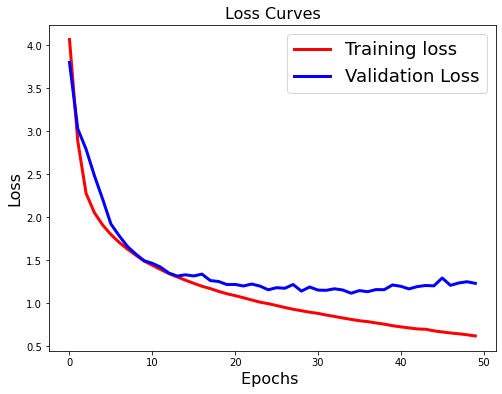

In [0]:
plt.figure(figsize=[8,6])
plt.plot(train.history['loss'],'r',linewidth=3.0)
plt.plot(train.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [0]:
#store the output predictions    
y_pred = model.predict_classes(testing_images)
y_pred

array([ 8,  0, 11, ...,  6,  6,  6])

In [0]:
#transform into same form as predictions
testing_labels=np.load('testing_labels.npy')

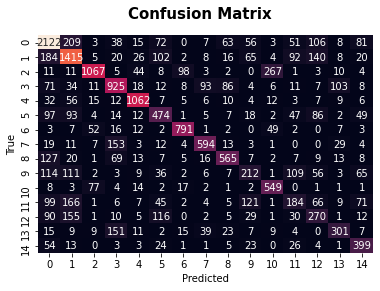

In [0]:
confusion_matrix =  pd.crosstab(index=testing_labels, columns=y_pred.ravel(), rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
# Plot Confusion Matrices
plt.suptitle('Confusion Matrix', fontsize=15, fontweight='bold')
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1.5})
plt.subplots_adjust(hspace=.7)

In [0]:
#denormalize images
testing_images *= 255

In [0]:
class_names=["Dress","T-shirt","Shoes","Pants","Bag","Shirt","Boots","Jeans","Skirt","Sweater",
             "Sandels","Cardigan","Blouse","Tights","Coat"]

In [0]:
testing_labels

array([14, 14, 14, ...,  6,  6,  6])

In [0]:
'''
50 Coat
505 Shirt
160 Sweater
33 Cardigan
228 Skirt
42 Blouse
111 Bag
516 Tights
368 Dress
155 Jeans
52 T-shirt
137 Sandels
461 Pants
311 Hoodie
48 Boots
522 Parka
178 Jacket
284 Shoes
'''

In [0]:
y_pred[1]

0

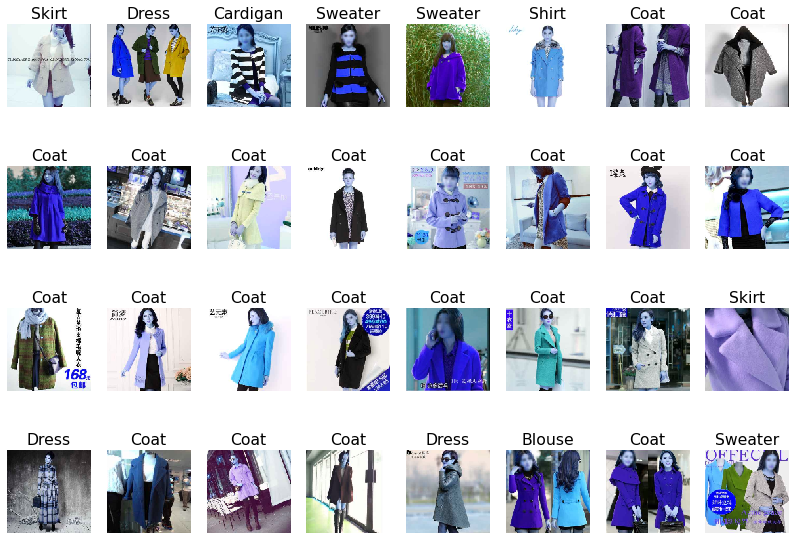

In [0]:
# Display the first few images
images_and_labels = list(zip(testing_images, y_pred))
plt.figure(figsize=(14,10))
for index, (image, label) in enumerate(images_and_labels[:32]):
    plt.subplot(4, 8, index + 1)
    plt.axis('off')
    plt.imshow(image, interpolation='nearest')
    imagedata = image[np.newaxis, :, :]
    pred = model.predict(imagedata)
    pred= pred[0].argmax(axis=0)
    plt.title(class_names[y_pred[index]])
plt.show()

In [0]:
type(y_pred)

numpy.ndarray

In [0]:
class_names[y_pred[0]]

'Skirt'

# Tenth model: 20 layer

In [0]:
batch_size = 64
epochs = 70
num_classes = 15
learning_rate=1.0e-4
callback = EarlyStopping(monitor='val_loss', patience=4)

In [0]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(3, 3),activation="relu",input_shape=(128,128,3),padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))  
model.add(BatchNormalization()) 
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))#relu
model.add(Dropout(0.25))                
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 128, 128, 96)      2688      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 128, 128, 64)      55360     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
dropout_22 (Dropout)         (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_23 (Batc (None, 128, 128, 64)     

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=learning_rate),metrics=['accuracy'])

In [0]:
train = model.fit(train_images, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images, validation_labels))

Train on 60662 samples, validate on 6780 samples
Epoch 1/70
60662/60662 [==============================] - 262s 4ms/step - loss: 4.1543 - accuracy: 0.1505 - val_loss: 3.6834 - val_accuracy: 0.1622
Epoch 2/70
60662/60662 [==============================] - 252s 4ms/step - loss: 3.1274 - accuracy: 0.1888 - val_loss: 2.9717 - val_accuracy: 0.1493
Epoch 3/70
60662/60662 [==============================] - 252s 4ms/step - loss: 2.4961 - accuracy: 0.2555 - val_loss: 2.7443 - val_accuracy: 0.1770
Epoch 4/70
60662/60662 [==============================] - 251s 4ms/step - loss: 2.1995 - accuracy: 0.3232 - val_loss: 2.4675 - val_accuracy: 0.2261
Epoch 5/70
60662/60662 [==============================] - 251s 4ms/step - loss: 2.0277 - accuracy: 0.3647 - val_loss: 2.2456 - val_accuracy: 0.2863
Epoch 6/70
60662/60662 [==============================] - 251s 4ms/step - loss: 1.9076 - accuracy: 0.3962 - val_loss: 2.3439 - val_accuracy: 0.2667
Epoch 7/70
60662/60662 [==============================] - 252s 

In [0]:
model_json = model.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_2.h5")
print("Saved model to disk")

Saved model to disk


Text(0.5, 1.0, 'Loss Curves')

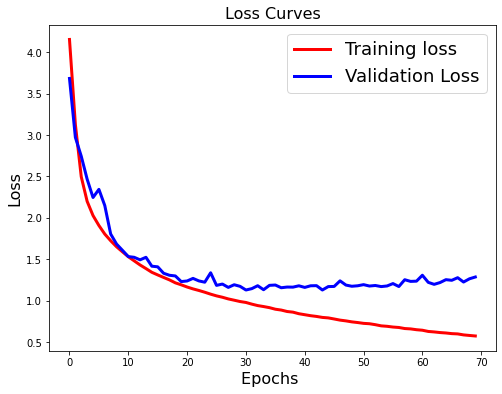

In [0]:
plt.figure(figsize=[8,6])
plt.plot(train.history['loss'],'r',linewidth=3.0)
plt.plot(train.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# 11th Model (CNN+MLP)

In [0]:
from keras.models import Model
from keras.layers import Flatten, Input, concatenate
from keras.layers.core import Activation

In [0]:
def create_mlp(dim, regularizer=None):
    """Creates a simple two-layer MLP with inputs of the given dimension"""
    model = Sequential()
    model.add(Dense(8, input_dim=dim, activation="relu", kernel_regularizer=regularizer))
    model.add(Dense(4, activation="relu", kernel_regularizer=regularizer))
    model.add(Dense(15, activation='softmax'))
    return model

In [0]:
def create_cnn(filters=(128, 128, 64, 64, 32), regularizer=None):
    """
    Creates a CNN with the given input dimension and filter numbers.
    """
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    inputShape = (128, 128, 3)
    chanDim = -1
 
    # Define the model input
    inputs = Input(shape=inputShape)
 
    # Loop over the number of filters 
    for (i, f) in enumerate(filters):
        # If this is the first CONV layer then set the input appropriately
        if i == 0:
            x = inputs
 
        # Create loops of CONV => RELU => BN => POOL layers
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)
        
    # Final layers - flatten the volume, then Fully-Connected => RELU => BN => DROPOUT
    x = Flatten()(x)
    x = Dense(16, kernel_regularizer=regularizer)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)
 
    # Apply another fully-connected layer, this one to match the number of nodes coming out of the MLP
    x = Dense(15, kernel_regularizer=regularizer)(x)
    x = Activation("softmax")(x)
    
    # Construct the CNN
    model = Model(inputs, x)
 
    # Return the CNN
    return model        


In [0]:
mlp = create_mlp(1)
cnn = create_cnn()

In [0]:
# Create the input to the final set of layers as the output of both the MLP and CNN
combinedInput = concatenate([mlp.output, cnn.output])

# The final fully-connected layer head will have two dense layers (one relu and one sigmoid)

x = Dense(15, activation='softmax')(combinedInput)

# The final model accepts numerical data on the MLP input and images on the CNN input, outputting a single value
model1 = Model(inputs=[cnn.input, mlp.input], outputs=x)


In [0]:
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

In [0]:
model1_history = model1.fit(
  [train_images, encoded_train_terms], train_labels
  , 
  validation_data=([validation_images, encoded_validation_terms],validation_labels ), 
  epochs=30, 
  batch_size=64)

Train on 60662 samples, validate on 6780 samples
Epoch 1/30
60662/60662 [==============================] - 235s 4ms/step - loss: 2.6868 - accuracy: 0.1003 - val_loss: 2.6478 - val_accuracy: 0.1189
Epoch 2/30
60662/60662 [==============================] - 225s 4ms/step - loss: 2.5941 - accuracy: 0.1453 - val_loss: 2.5569 - val_accuracy: 0.1795
Epoch 3/30
60662/60662 [==============================] - 225s 4ms/step - loss: 2.5098 - accuracy: 0.1975 - val_loss: 2.4653 - val_accuracy: 0.2212
Epoch 4/30
60662/60662 [==============================] - 224s 4ms/step - loss: 2.4246 - accuracy: 0.2363 - val_loss: 2.3932 - val_accuracy: 0.2577
Epoch 5/30
60662/60662 [==============================] - 224s 4ms/step - loss: 2.3497 - accuracy: 0.2530 - val_loss: 2.3033 - val_accuracy: 0.2627
Epoch 6/30
60662/60662 [==============================] - 224s 4ms/step - loss: 2.2833 - accuracy: 0.2900 - val_loss: 2.2650 - val_accuracy: 0.2928
Epoch 7/30
60662/60662 [==============================] - 224s 

# Transfer Learning + MLP

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Input, concatenate
from keras.layers.core import Activation

In [0]:
def create_cnn(filters=(128, 128, 64, 64, 32), regularizer=None):
    """
    Creates a CNN with the given input dimension and filter numbers.
    """
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
   # inputShape = (128, 128, 3)
    #chanDim = -1
 
    # Define the model input
    #inputs = Input(shape=inputShape)
    model = VGG16(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))
    x = model.output
    x=BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation="relu")(x)
  
    # Construct the CNN
    model = Model(model.inputs, x)
 
    # Return the CNN
    return model        


In [0]:
def create_mlp(dim, regularizer=None):
    """Creates a simple two-layer MLP with inputs of the given dimension"""
    model = Sequential()
    model.add(Dense(8, input_dim=dim, activation="relu", kernel_regularizer=regularizer))
    model.add(Dense(4, activation="relu", kernel_regularizer=regularizer))
    model.add(Dense(15, activation='softmax'))
    return model

In [0]:
mlp = create_mlp(1)
cnn = create_cnn()

In [0]:

# Create the input to the final set of layers as the output of both the MLP and CNN
combinedInput = concatenate([mlp.output, cnn.output])

# The final fully-connected layer head will have two dense layers (one relu and one sigmoid)

x = Dense(15, activation='softmax')(combinedInput)

# The final model accepts numerical data on the MLP input and images on the CNN input, outputting a single value
model1 = Model(inputs=[cnn.input, mlp.input], outputs=x)


In [0]:
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
model1_history = model1.fit(
  [train_images, encoded_train_terms], train_labels
  , 
  validation_data=([validation_images, encoded_validation_terms],validation_labels ), 
  epochs=30, 
  batch_size=64)

Train on 60662 samples, validate on 6780 samples
Epoch 1/30
60662/60662 [==============================] - 163s 3ms/step - loss: 2.3206 - accuracy: 0.2309 - val_loss: 2.4746 - val_accuracy: 0.3001
Epoch 2/30
60662/60662 [==============================] - 152s 3ms/step - loss: 1.9909 - accuracy: 0.3192 - val_loss: 7.3795 - val_accuracy: 0.2914
Epoch 3/30
60662/60662 [==============================] - 152s 3ms/step - loss: 1.8446 - accuracy: 0.3680 - val_loss: 2.6002 - val_accuracy: 0.3385
Epoch 4/30
60662/60662 [==============================] - 152s 2ms/step - loss: 1.7265 - accuracy: 0.4076 - val_loss: 2.4354 - val_accuracy: 0.4223
Epoch 5/30
60662/60662 [==============================] - 151s 2ms/step - loss: 1.6304 - accuracy: 0.4371 - val_loss: 1.8503 - val_accuracy: 0.3789
Epoch 6/30
60662/60662 [==============================] - 152s 2ms/step - loss: 1.5394 - accuracy: 0.4654 - val_loss: 1.9161 - val_accuracy: 0.4544
Epoch 7/30
60662/60662 [==============================] - 152s 